In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


question1

In [2]:
list3=[]
for size in [1000]:
    np.random.seed(0)
    x= np.random.normal(5,0.5,size).reshape(size,1)
    b0= np.ones((1,size)).reshape(size,1) 
    b1= 0.5*np.ones((1,size)).reshape(size,1)
    e=np.random.normal(0,0.7,size).reshape(size,1)
    y= b0+(np.multiply(b1,x))+e
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=42)
    lr= LinearRegression(fit_intercept=False)
    lr.fit(x_train,y_train)
    y_pred_1=lr.predict(x_test)
    mspe_actual=((y_test- y_pred_1)**2).mean()
    list3.append(float(mspe_actual))

In [3]:
#k folds cross validation
list2=[]
np.random.seed(0)
for k in [2,3,4,5,6,8,10]:
    list1=[]
    for item in range(1,k+1):
        np.random.shuffle(x)
        df_x=pd.DataFrame(x)
        df_x.columns=['input']
        df_y=pd.DataFrame(y)
        df_y.columns=['output']
        r=round(x.shape[0]/k)
        if item==1:
            n=0
        else:
            n=r
        df_test_x=df_x.iloc[n:n+r,:]
        df_test_y=df_y.iloc[n:n+r,:]
        df_test_x.index.names=['key']
        drop_list=list(df_test_x.index)
        df_train_x=df_x.drop(drop_list,axis=0)
        df_train_y=df_x.drop(drop_list,axis=0)
        lr.fit((df_train_x),(df_train_y))
        y_pred=lr.predict((df_test_x))
        y_actual=np.array(df_test_y)
        mspe= ((y_actual-y_pred)**2).mean()
        list1.append(float(mspe))
    mean= sum(list1)/len(list1)
    list2.append(mean)

In [4]:
d= {'sample_size':[1000,1000,1000,1000,1000,1000,1000],'mspe_actual':np.repeat(list3[0],7,axis=0).tolist(),'k':[2,3,4,5,6,8,10],'mspe_cross':list2}
df=pd.DataFrame(d)
df['diff']=df['mspe_cross']-df['mspe_actual']
df

,sample_size,mspe_actual,k,mspe_cross,diff
0,1000,0.546261,2,2.926883,2.380622
1,1000,0.546261,3,2.868671,2.322411
2,1000,0.546261,4,2.967499,2.421239
3,1000,0.546261,5,2.981677,2.435416
4,1000,0.546261,6,2.926589,2.380328
5,1000,0.546261,8,2.675304,2.129043
6,1000,0.546261,10,2.420423,1.874162


question2

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [9]:
#pvalue by classicalt test
x2= sm.add_constant(x)
results = sm.OLS(y, x2).fit()
p_val= results.pvalues[1]



In [10]:
#pvalue by bootstrap for 1000 sims
list_pvals=[]
list_new=[]
df1=pd.DataFrame(x)
df1.columns=['input']
for n in [10,20,30,50,100,200,300,500,600]:
    for isim in range(1,1001):
        #sampling out of the dataframe
        df_sample=df1.sample(n,replace=True,axis=0,random_state=isim)
        x1=np.array(df_sample)
        b0= np.ones((1,n)).reshape(n,1) 
        b1= 0.5*np.ones((1,n)).reshape(n,1)
        e=np.random.normal(0,0.7,n).reshape(n,1)
        y1= b0+(np.multiply(b1,x1))+e
        x1 = sm.add_constant(x1)
        results = sm.OLS(y1, x1).fit()
        list_pvals.append(results.pvalues[1])
    mean=sum(list_pvals)/len(list_pvals)
    list_new.append(mean)


In [11]:
## Convert to Dataframe for analysis
d= {'Bootstrap_smaplesize':[10,20,30,50,100,200,300,500,600],'sample_size':np.repeat(1000,9).tolist(),'P_val_actual':np.repeat(p_val,9),'p_val_Bootstrap':list_new}
df=pd.DataFrame(d)
df['diff']= df['P_val_actual']-df['p_val_Bootstrap']
df


,Bootstrap_smaplesize,sample_size,P_val_actual,p_val_Bootstrap,diff
0,10,1000,0.589872,0.367022,0.222849
1,20,1000,0.589872,0.311646,0.278226
2,30,1000,0.589872,0.266275,0.323597
3,50,1000,0.589872,0.221629,0.368243
4,100,1000,0.589872,0.180669,0.409203
5,200,1000,0.589872,0.150671,0.439200
6,300,1000,0.589872,0.129150,0.460722
7,500,1000,0.589872,0.113006,0.476866
8,600,1000,0.589872,0.100450,0.489422


In [13]:
cd desktop

C:\Users\Akhil Chelikani\desktop


question3

In [51]:
import pandas as pd
import numpy as np

In [52]:
bitcoin= pd.read_csv('bitcoin.csv')

In [53]:
btc=bitcoin[['Date','Close']]

In [54]:
btc.columns=['DATE','Close_btc']
btc.head()

,DATE,Close_btc
0,2014-01-01,815.940002
1,2014-01-02,856.909973
2,2014-01-03,884.260010
3,2014-01-04,924.690002
4,2014-01-05,1014.739990


In [55]:
sp= pd.read_csv('SP500.csv')
sp.head()

,DATE,SP500
0,2014-01-02,1831.98
1,2014-01-03,1831.37
2,2014-01-06,1826.77
3,2014-01-07,1837.88
4,2014-01-08,1837.49


In [56]:
lbp= pd.read_csv('GOLDAMGBD228NLBM.csv')
lbp.head()

,DATE,GOLDAMGBD228NLBM
0,2014-01-02,1219.75
1,2014-01-03,1232.25
2,2014-01-06,1238
3,2014-01-07,1237.5
4,2014-01-08,1226.5


In [57]:
uee= pd.read_csv('DEXUSEU.csv')
uee.head()

,DATE,DEXUSEU
0,2014-01-02,1.367
1,2014-01-03,1.3606
2,2014-01-06,1.3636
3,2014-01-07,1.3618
4,2014-01-08,1.3586


In [58]:
wto= pd.read_csv('DCOILWTICO.csv')
wto.head()

,DATE,DCOILWTICO
0,2014-01-02,95.14
1,2014-01-03,93.66
2,2014-01-06,93.12
3,2014-01-07,93.31
4,2014-01-08,91.9


In [59]:
a=sp.merge(lbp,on='DATE')
b=a.merge(uee,on='DATE')
data=b.merge(wto,on='DATE')
final_df= pd.merge(btc,data,on=['DATE'],how='inner')

In [60]:
final_df.replace('.',np.nan,inplace=True)

In [61]:
final_df

,DATE,Close_btc,SP500,GOLDAMGBD228NLBM,DEXUSEU,DCOILWTICO
0,2014-01-02,856.909973,1831.98,1219.75,1.367,95.14
1,2014-01-03,884.260010,1831.37,1232.25,1.3606,93.66
2,2014-01-06,1012.650024,1826.77,1238,1.3636,93.12
3,2014-01-07,879.900024,1837.88,1237.5,1.3618,93.31
4,2014-01-08,938.840027,1837.49,1226.5,1.3586,91.9
5,2014-01-09,936.950012,1838.13,1226,1.3591,91.36
6,2014-01-10,957.760010,1842.37,1232.25,1.3664,92.39
7,2014-01-13,922.909973,1819.2,1246,1.3647,91.45
8,2014-01-14,919.280029,1838.88,1248.75,1.3682,92.15
9,2014-01-15,941.219971,1848.38,1238,1.3604,93.78


In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 0 to 1362
Data columns (total 6 columns):
DATE                1363 non-null object
Close_btc           1363 non-null float64
SP500               1315 non-null object
GOLDAMGBD228NLBM    1322 non-null object
DEXUSEU             1305 non-null object
DCOILWTICO          1312 non-null object
dtypes: float64(1), object(5)
memory usage: 74.5+ KB


In [63]:
for item in ['Close_btc','SP500','GOLDAMGBD228NLBM','DEXUSEU','DCOILWTICO']:
    final_df[item]=final_df[item].astype(float)

In [64]:
final_df['DATE'] = pd.to_datetime(final_df['DATE'])

In [65]:
final_df.dropna(axis=0,how='any',inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1362
Data columns (total 6 columns):
DATE                1277 non-null datetime64[ns]
Close_btc           1277 non-null float64
SP500               1277 non-null float64
GOLDAMGBD228NLBM    1277 non-null float64
DEXUSEU             1277 non-null float64
DCOILWTICO          1277 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 69.8 KB


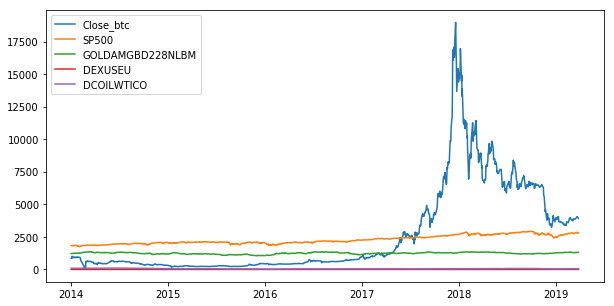

In [66]:
#plotting each series
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(1,6):
    x= np.array(final_df['DATE'])
    y= np.array(final_df.iloc[:,i])
    plt.plot(x,y,label=final_df.columns[i])
plt.legend()

<Figure size 360x360 with 0 Axes>

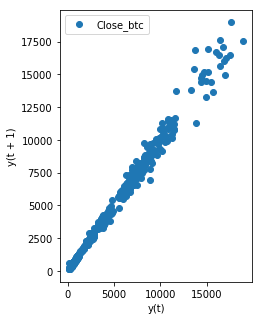

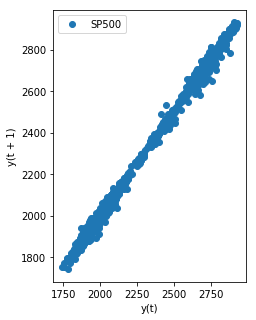

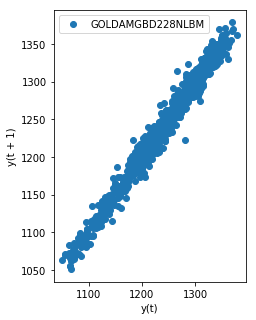

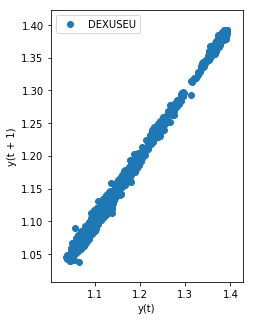

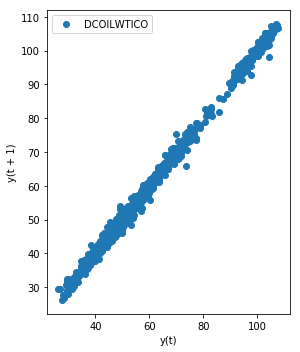

In [67]:
#lag plots to see for autocorrelation
from pandas import Series
from pandas.plotting import lag_plot
plt.figure(figsize=(5,5))
for i in range(1,6):
    plt.figure(figsize=(20,5))
    plt.subplot(1,5,i)
    lag_plot(final_df.iloc[:,i],label=final_df.columns[i])
    plt.legend()
plt.tight_layout()
plt.show()

In [68]:
#running a linear regression regression using close_btc as the as the target variables and the other series as the explanatory varaibles
from sklearn.linear_model import LinearRegression
lr= LinearRegression(fit_intercept=True)
lr.fit(final_df.drop(['Close_btc','DATE'],axis=1),final_df['Close_btc'])
lr.coef_

array([ 9.88456693e+00, -3.06495730e+00,  2.37831639e+04, -6.15950627e+01])

In [69]:
#kpss test to figure out weather the series are satioanry at differnt value for lags
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import patsy as pt
import warnings
x =[]
warnings.filterwarnings("ignore")
series = final_df['Close_btc'].copy()
for i in range(0,1000):
    new=st.kpss(series, regression='c')
    if new[1]>0.05:
        break
        x.append(i)
    series = series.diff()[1:]
print(i)
        

1


In [70]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import patsy as pt
import warnings
x =[]
warnings.filterwarnings("ignore")
series = final_df['SP500'].copy()
for i in range(0,1000):
    new=st.kpss(series, regression='c')
    if new[1]>0.05:
        break
        x.append(i)
    series = series.diff()[1:]
print(i)

1


In [71]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import patsy as pt
import warnings
x =[]
warnings.filterwarnings("ignore")
series = final_df['GOLDAMGBD228NLBM'].copy()
for i in range(0,1000):
    new=st.kpss(series, regression='c')
    if new[1]>0.05:
        break
        x.append(i)
    series = series.diff()[1:]
print(i)

1


In [72]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import patsy as pt
import warnings
x =[]
warnings.filterwarnings("ignore")
series = final_df['DEXUSEU'].copy()
for i in range(0,1000):
    new=st.kpss(series, regression='c')
    if new[1]>0.05:
        break
        x.append(i)
    series = series.diff()[1:]
print(i)

1


In [73]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import patsy as pt
import warnings
x =[]
warnings.filterwarnings("ignore")
series = final_df['DCOILWTICO'].copy()
for i in range(0,1000):
    new=st.kpss(series, regression='c')
    if new[1]>0.05:
        break
        x.append(i)
    series = series.diff()[1:]
print(i)

1


In [74]:
#linear regression after differencing
series_bitcoin= final_df['Close_btc'].copy()
series_bitcoin= series_bitcoin.diff()[1:]
series_SP500= final_df['SP500'].copy()
series_SP500= series_SP500.diff()[1:]
series_GOLDAMGBD228NLBM= final_df['GOLDAMGBD228NLBM'].copy()
series_GOLDAMGBD228NLBM= series_GOLDAMGBD228NLBM.diff()[1:]
series_DEXUSEU= final_df['DEXUSEU'].copy()
series_DEXUSEU= series_DEXUSEU.diff()[1:]
series_DCOILWTICO= final_df['DCOILWTICO'].copy()
series_DCOILWTICO= series_DCOILWTICO.diff()[1:]
x=pd.DataFrame({'SP500':series_SP500,'GOLDAMGBD228NLBM':series_GOLDAMGBD228NLBM,'DEXUSEU':series_DEXUSEU,'DCOILWTICO':series_DCOILWTICO})
y=pd.DataFrame({'target':series_bitcoin})

In [75]:
#linear regression after differencing
lr= LinearRegression(fit_intercept=True)
lr.fit(x,y)
lr.coef_

array([[   0.93451181,    0.83885996, -484.85227228,   -4.52666238]])

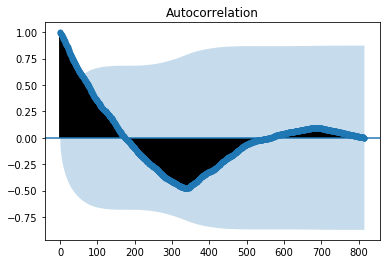

In [111]:
#acf plot
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

price = btc_after_2017.iloc[:,-1].values
date = btc_after_2017.iloc[:,0].values
plot_acf(price, ax=pyplot.gca())
pyplot.show()

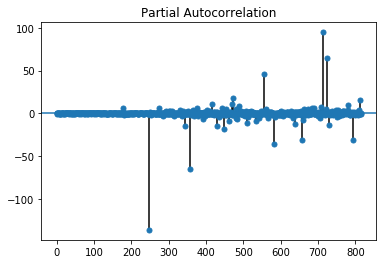

In [112]:
#pacf plot
plot_pacf(price, ax=pyplot.gca())
pyplot.show()

In [113]:
#auto arima to determine the best arima model
import pyramid
from pyramid.arima import auto_arima
stepwise_model = auto_arima(btc_after_2017.iloc[:,1], seasonal=False,d=1,stepwise=False,ic='aic')
print(stepwise_model)


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(5, 1, 4),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend='c')


In [122]:
# using the best arima model to fit our series
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(btc_after_2017.iloc[:,1], order=(5,1,4))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Close_btc   No. Observations:                  815
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -5928.944
Method:                       css-mle   S.D. of innovations            348.935
Date:                Wed, 10 Apr 2019   AIC                          11879.888
Time:                        22:53:45   BIC                          11931.623
Sample:                             1   HQIC                         11899.745
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.2930     13.641      0.315      0.753     -22.443      31.030
ar.L1.D.Close_btc     0.2783      0.069      4.025      0.000       0.143       0.414
ar.L2.D.Close_btc     0.

In [115]:
prediction = model_fit.forecast(30)[0]

In [116]:
prediction

array([4590.98421944, 4494.54676003, 4412.40718213, 4297.60596397,
       4343.81087871, 4363.4926369 , 4466.20491843, 4585.24786926,
       4634.58956977, 4718.38480958, 4688.05921043, 4659.84637775,
       4606.41955355, 4518.8115137 , 4502.19587074, 4460.98961458,
       4488.13680705, 4532.37027099, 4569.07676682, 4641.62978691,
       4657.10347193, 4681.75427063, 4673.577966  , 4638.39238645,
       4624.03625279, 4581.74118246, 4577.68222833, 4577.98896878,
       4587.98986721, 4626.24613117])

Text(0, 0.5, 'bitcoin closing price')

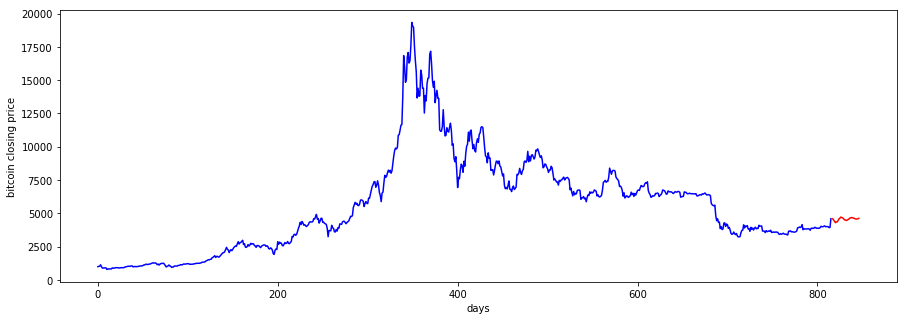

In [117]:
plt.figure(figsize=(15,5))
x=np.array(btc_after_2017['DATE'])
plt.plot(np.arange(0,816),np.array(btc_after_2017.iloc[:,1]),'b')
plt.plot(np.arange(817,847),prediction,'r')
plt.xlabel('days')
plt.ylabel('bitcoin closing price')

In [118]:
from scipy import signal
import matplotlib.pyplot as plt

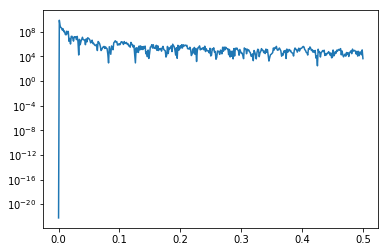

In [119]:
# as we can see from the periodgram, there are no considerble spikes which sugest there is no seasonality in the data
plt.figure()
f, Pxx_den = signal.periodogram(btc_after_2017.iloc[:,1], fs=1)
plt.semilogy(f, Pxx_den)

In [ ]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR()
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))